In [19]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np
import seaborn as sns
import tensorflow as tf
import numpy as np
import cv2
from keras.utils import to_categorical
from numpy import argmax
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from keras import backend as K


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [20]:
DIR = 'C:\\Users\\agandra\\Downloads\\CNNDataset'
train_data=[]
train_label=[]
test_data=[]
IMG_SIZE=950
heights = []
widths = []
img_data_list=[]
labels_list = []
labels_name={'fire':0,'smoke':1,'nofire':2}
def label_img(word_label):
    if (word_label == 'fire') : return np.array([1,0,0])
    elif (word_label == 'smoke') : return np.array([0,1,0])
    elif (word_label == 'no fire') or (word_label == 'nofire') or (word_label == 'no-fire'): return np.array([0,0,1])
    else : return np.array([0,0,1])
    


In [23]:
for root,folders,files in os.walk(DIR):
    if len(files) < 2: continue
    #print(files)
    image_file = os.path.join(root, files[0])
    #print(image_file)
    label_name = open(os.path.join(root, files[3])).readlines()[1].strip("\n").lower()
    #print(label_name)
    img=Image.open(image_file)
    input_img=cv2.imread(image_file)
    #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    #input_img_resize=cv2.resize(input_img,(IMG_SIZE,IMG_SIZE))
    img = img.convert('L')
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    data=np.array(img)
    train_data.append(data)
    heights.append(data.shape[0])
    widths.append(data.shape[1])
    trainLabels=label_img(label_name)
    train_label.append(trainLabels)
    #img_data_list.append(input_img_resize)
    labels_list.append(label_name)
    
avg_height = sum(heights) / len(heights)
avg_width = sum(widths) / len(widths)
print("Average Height: " + str(avg_height))
print("Max Height: " + str(max(heights)))
print("Min Height: " + str(min(heights)))
print('\n')
print("Average Width: " + str(avg_width))
print("Max Width: " + str(max(widths)))
print("Min Width: " + str(min(widths)))
#img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
#img_data /= 255
#print (img_data.shape)

Average Height: 950.0
Max Height: 950
Min Height: 950


Average Width: 950.0
Max Width: 950
Min Width: 950


In [24]:
labels = np.array(labels_list)
print(np.unique(labels,return_counts=True))

(array(['d', 'fire', 'no fire', 'no-fire', 'nofire', 'smoke'], dtype='<U7'), array([  12,  846,  285,  244,  502, 1048], dtype=int64))


In [25]:
trainImages = np.array(train_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array(train_label)


In [26]:

train_x, test_x, train_y, test_y = train_test_split(trainImages, trainLabels, random_state = 20, 
                                                   test_size=0.3)

In [27]:
train_mean = np.mean(train_x, axis=0)
train_std = np.std(train_x, axis=0)
test_mean = np.mean(test_x, axis=0)
test_std = np.std(test_x, axis=0)

train_norm = (train_x - train_mean) / train_std
test_norm = (test_x - test_mean) / test_std



In [28]:
IMG_SIZE=950
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 948, 948, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 474, 474, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 474, 474, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 472, 472, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 236, 236, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 236, 236, 64)      256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 234, 234, 96)      55392     
__________

In [30]:
history=model.fit(train_norm,train_y,validation_split=0.2,batch_size = 20, epochs = 20, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 1644 samples, validate on 411 samples
Epoch 1/20
1644/1644 [==============================] - 2245s 1s/step - loss: 0.5232 - acc: 0.7356 - val_loss: 0.5553 - val_acc: 0.7559
Epoch 2/20
1644/1644 [==============================] - 2888s 2s/step - loss: 0.4494 - acc: 0.7871 - val_loss: 0.4636 - val_acc: 0.7908
Epoch 3/20
1644/1644 [==============================] - 2601s 2s/step - loss: 0.3729 - acc: 0.8262 - val_loss: 0.6272 - val_acc: 0.7510
Epoch 4/20
1644/1644 [==============================] - 2112s 1s/step - loss: 0.4065 - acc: 0.8080 - val_loss: 0.3412 - val_acc: 0.8305
Epoch 5/20
1644/1644 [==============================] - 1857s 1s/step - loss: 0.3246 - acc: 0.8459 - val_loss: 0.4125 - val_acc: 0.8037
Epoch 6/20
1644/1644 [==============================] - 2603s 2s/step - loss: 0.3120 - acc: 0.8508 - val_loss: 0.3143 - val_acc: 0.8491
Epoch 7/20
1644/1644 [==============================] - 1941s 1s/step - loss: 0.3190 - ac

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


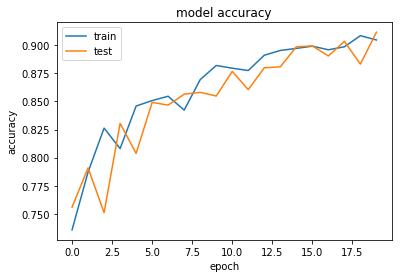

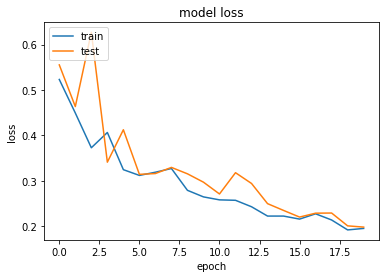

In [31]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

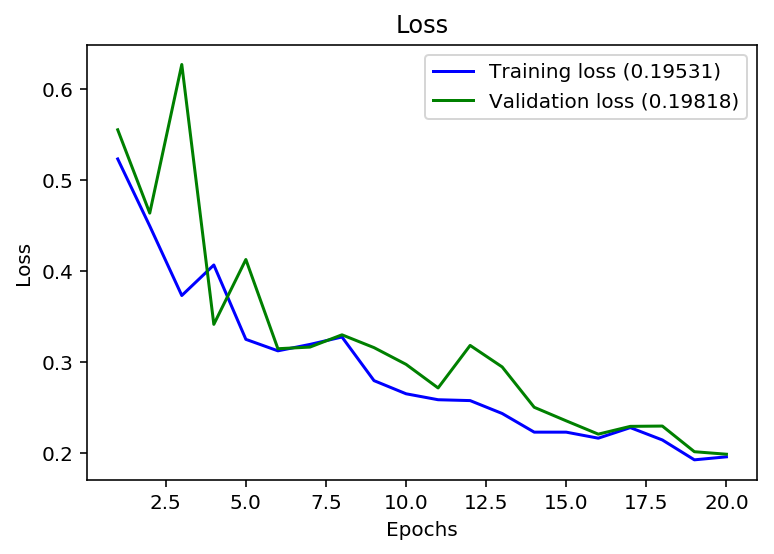

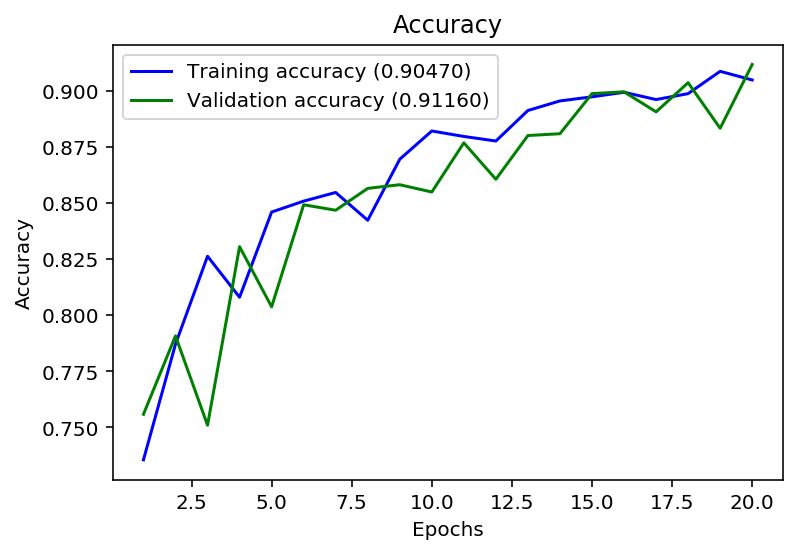

In [32]:
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np
import seaborn as sns
import tensorflow as tf
import numpy as np
import cv2
from keras.utils import to_categorical
from numpy import argmax
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

seed = 1000
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)



In [33]:
loss, acc = model.evaluate(test_norm, test_y, verbose = 0)
print(loss)
print(acc * 100)

0.22542301847550875
90.36281285913083


In [34]:
from sklearn.metrics import classification_report
y_pred=model.predict(test_norm, batch_size=20, verbose=2)
report = classification_report(test_y, y_pred.round())
print(report)



              precision    recall  f1-score   support

           0       0.77      0.75      0.76       243
           1       0.89      0.82      0.85       334
           2       0.90      0.96      0.93       305

   micro avg       0.86      0.85      0.85       882
   macro avg       0.85      0.84      0.85       882
weighted avg       0.86      0.85      0.85       882
 samples avg       0.85      0.85      0.85       882



C:\Users\agandra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


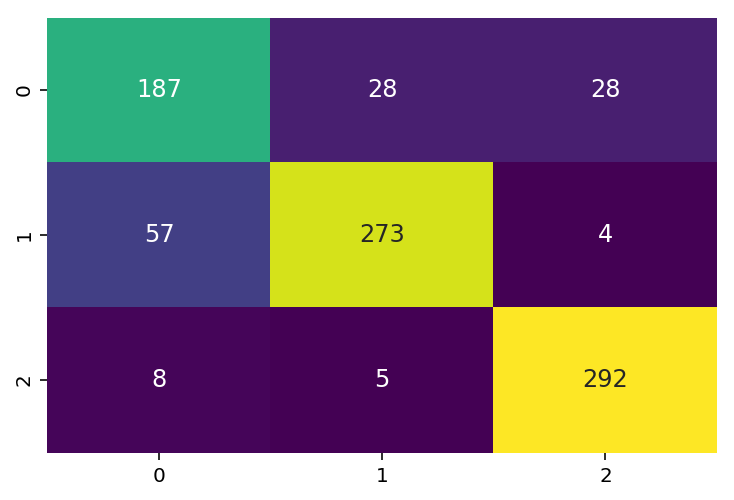

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()
draw_confusion_matrix(test_y.argmax(axis=1), y_pred.round().argmax(axis=1))

In [36]:
test_image = test_norm[0:1]
print (test_image.shape)

model_out=model.predict(test_image)
print(model_out)
print(np.argmax(model_out))

(1, 950, 950, 1)
[[0.51913226 0.44045383 0.04041388]]
0
